# Assignment 04 Due: Wednesday 9/21

## Problem 1

For this assignment we will look at the normal distribution function's PDF and how we can use it to calculate probabilities. Import the numpy, scipy.stats, scipy.integrate, and matplotlib.pyplot libraries.

In [ ]:
import numpy as np
import scipy.stats as st
import scipy.integrate as i
import matplotlib.pyplot as plt

# Problem 2

Use the scipy library to plot the pdf of a normal distribution that has a mean of 10, sigma of 0.5 and spans the range 5 to 15.
> scipy.stats.norm.pdf(x, loc, scale)

function to plot the pdf of the normal distribution. Here x should be a numpy array of 1000 points from 5 to 15. The prameter loc and scale that the function takes as input is the mean and sigma values of the normal distribution. You plot should look like what is shown below. 

<div>
<img src="attachment:P2.png" width="400"/>
</div>

In [ ]:
x = np.linspace(5, 15, 1000)
loc = 10
scale = 0.5
n = st.norm.pdf(x, loc, scale)

Text(0.5, 1.0, 'Normal Distribution')

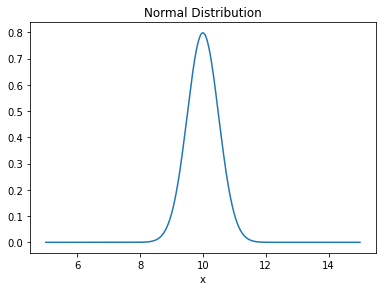

In [ ]:

fig = plt.figure()
nd = fig.add_axes([0.1,0.1,0.8,0.8])
nd.plot(x, n)
nd.set_xlabel('x')
nd.set_title('Normal Distribution')

# Problem 3

We can calculate the probability that our value lies in a particular range. For the normal distribution the number of sigmas that you are away from the mean are directly related to the probability of finding our value in that range. 

For example if our value x lies in the range $\mu - \sigma \le x \le \mu +\sigma$, where $\mu$ is the mean value of the distribution (10 in this assignment), then the probability of our value x lying in that range is $68.2\%$. 

The probability that x lies in the range $\mu - 2\sigma \le x \le \mu + 2\sigma$ is $95.4\%$. As our range becomes wider, so the the probability that it contains our value x. This can be seen from the plot below (taken from [wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#/media/File:Standard_deviation_diagram_micro.svg)). 


We will first use the cumulative distribution function (CDF) from scipy to verify these probabilities.

Using
>scipy.stats.norm.cdf(x,loc,scale)

where the inputs are:
* x tells the cdf to add all values upto and below x
* loc is the mean value of the normal distribution
* scale is the sigma of the normal distribution

Use the scipy cdf function to evaluate the probability in the following ranges:
* mean $-\sigma < x <$ mean $+ \sigma$
* mean $-2\sigma < x <$ mean $+ 2\sigma$
* mean $-3\sigma < x <$ mean $+ 3\sigma$

In [ ]:
μ = 10
σ = 0.5

x1a = μ - σ
x1b = μ + σ

x2a = μ - (2*σ)
x2b = μ + (2*σ)

x3a = μ - (3*σ)
x3b = μ + (3*σ)

p1 = (st.norm.cdf(x1b,μ,σ) - st.norm.cdf(x1a,μ,σ)) * 100
p2 = (st.norm.cdf(x2b,μ,σ) - st.norm.cdf(x2a,μ,σ)) * 100
p3 = (st.norm.cdf(x3b,μ,σ) - st.norm.cdf(x3a,μ,σ)) * 100

print(p1,'%')
print(p2,'%')
print(p3,'%')

68.26894921370858 %
95.44997361036415 %
99.73002039367398 %


# Problem 4

Define a function that takes an array x, and numbers a and b, which correspond to the mean and sigma of a normal distibution, and returns the evaluation of

$$\frac{1}{b\sqrt{2\pi}}\exp\left[{-\frac{1}{2}\left(\frac{(x-a)}{b}\right)^2}\right] $$

In [6]:
pi = 3.141592653589793238

def eval(x, a, b):
  eq = (1/(b*np.sqrt(2*pi)))*np.exp((-1/2)*((x-a)/b)**2)
  return eq

# Problem 5

Make a numpy array called xx that contains 1000 points over the range 5 to 15. Use your gaus function from the previous problem that takes the arguments xx, mean, and sigma. Here the mean = 10 and sigma = 0.5, same as in Problem 2. Call this array yy.

Then plot yy vs. xx as markers, and compare it to the PDF curve you found in Problem 2 by plotting both on the same canvas. See below for what you plot should look like.

<div>
<img src="attachment:P5.png" width="400"/>
</div>


In [8]:
xx = np.linspace(5, 15, 1000) #(x)
μ = 10 #(a)
σ = 0.5 #(b)
pi = 3.141592653589793238
yy = eval(xx, μ, σ)

Text(0.5, 1.0, 'Comparison')

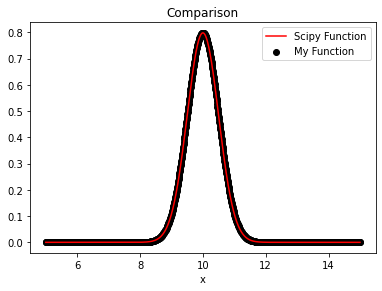

In [19]:
fig = plt.figure()
c = fig.add_axes([0.1,0.1,0.8,0.8])
c.scatter(xx, yy, label='My Function', color='black')
c.plot(x, n, label='Scipy Function', color='red')
c.set_xlabel('x')
c.legend()
#different graph
c.set_title('Comparison')

# Problem 6

Because the CDF is just the integral of the PDF, we should be able to integrate our gaus function over a particular range and obtain the same probabilities we found in Problem 3.

Use the 
>scipy.integrate.quad(function, a, b, args=(mean, sigma))

where function should be our gaus function, a is the lower limit of our integral, b is the upper limit of the integral, and args are the arguments taken by our gaus function. In our case this is the mean = 10, and sigma = 0.5. This will give you an array with two elements. The first is the integral value (e.g. our probability) and the second is the numerical error of the integration. Remember numerical integrations are approximations so there is an error associated with the calculation.

Using scipy.integrate.quad integrate your gaus function of the three ranges specified in Problem 3.

**Do you end up with the same probabilities?**

In [20]:
x1a = μ - σ
x1b = μ + σ

x2a = μ - (2*σ)
x2b = μ + (2*σ)

x3a = μ - (3*σ)
x3b = μ + (3*σ)

In [27]:
c = ((i.quad(eval, x1a, x1b, args=(μ, σ))))
c1 = c[0] * 100 
print(c1, '%')

c = ((i.quad(eval, x2a, x2b, args=(μ, σ))))
c2 = c[0] * 100 
print(c2, '%')

c = ((i.quad(eval, x3a, x3b, args=(μ, σ))))
c3 = c[0] * 100 
print(c3, '%')

68.2689492137086 %
95.44997361036413 %
99.730020393674 %


My answers were very close to problem 3, with all of the first few decimal points being the same